In [1]:
%matplotlib inline
import numpy as np

# Increasing synaptic number in a dendritic branch

X-bar label automatically set to:  33.4  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  43.6  Using the format %.1f  --> adjust it and add units through the format !
X-bar label automatically set to:  33.4  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  43.6  Using the format %.1f  --> adjust it and add units through the format !
X-bar label automatically set to:  33.4  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  43.6  Using the format %.1f  --> adjust it and add units through the format !
X-bar label automatically set to:  33.4  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  43.6  Using the format %.1f  --> adjust it and add units through the format !
X-bar label automatically set to:  33.4  Using the format %.1f  --> adjust it and add units thro

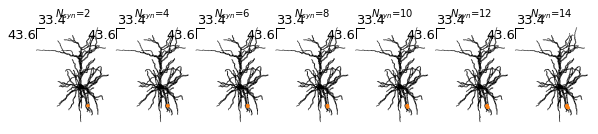

In [2]:
%run nmda-spike syn-demo

## $V_m$ response to increasing synaptic recruitment

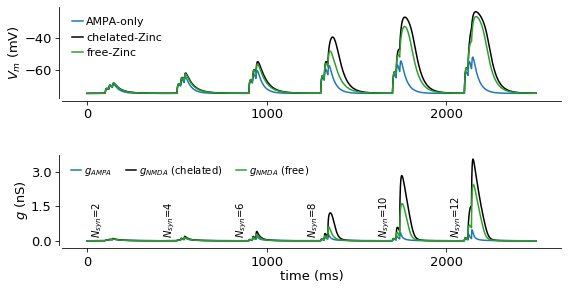

In [3]:
%run nmda-spike demo-plot

# Running this simulation across different dendritic locations 

X-bar label automatically set to:  33.4  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  43.6  Using the format %.1f  --> adjust it and add units through the format !


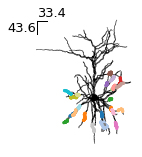

25 segments


In [4]:
%run nmda-spike locations

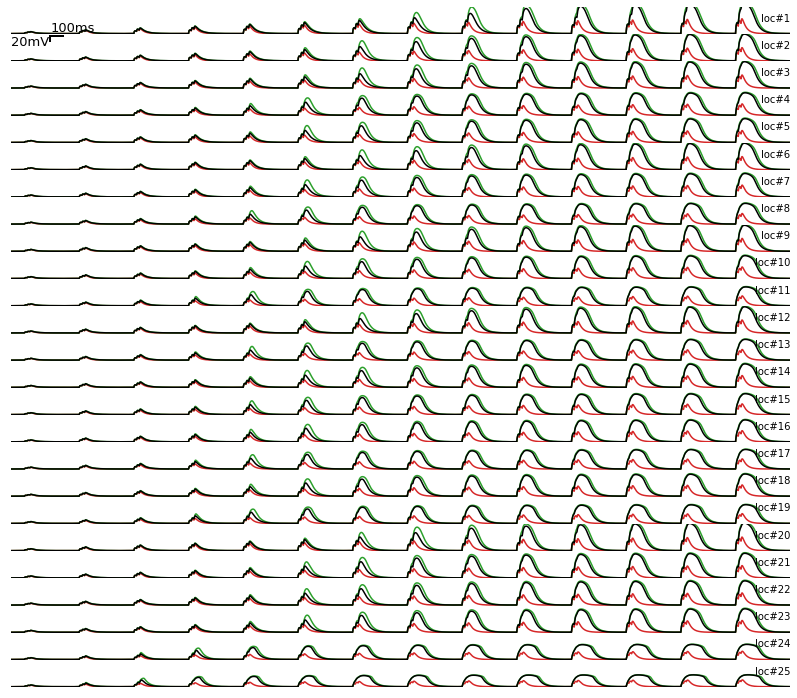

In [5]:
fig, AX = ge.figure(axes=(1, len(LOCs)), figsize=(2.5,.3), hspace=0)
for i, loc in enumerate(LOCs):
    data = load_dict('data/nmda-spike/data-loc-%i-AMPA-only.npz' % loc)
    AX[i].plot(data['t'], data['Vm_soma'], color=ge.red)
    data = load_dict('data/nmda-spike/data-loc-%i-chelated-Zinc.npz' % loc)
    AX[i].plot(data['t'], data['Vm_soma'], color=ge.green)
    data = load_dict('data/nmda-spike/data-loc-%i-free-Zinc.npz' % loc)
    AX[i].plot(data['t'], data['Vm_soma'], color='k')
    ge.annotate(AX[i], 'loc#%i' % (i+1), (1.,.4), size='xx-small', ha='right')
    ge.set_plot(AX[i], [], xlim=[data['t'][0], data['t'][-1]], ylim=[-76, -30])
ge.draw_bar_scales(AX[1], Xbar=100, Ybar=10, loc='left-top', Xbar_label='100ms', Ybar_label='20mV', lw=2)

In [9]:

def get_third_pulse_cond_areas(loc, NSYNs,
                              integral_interval=[40, 100]):

    data0 = load_dict('data/nmda-spike/data-loc-%i-AMPA-only.npz' % loc)
    data1 = load_dict('data/nmda-spike/data-loc-%i-chelated-Zinc.npz' % loc)
    data2 = load_dict('data/nmda-spike/data-loc-%i-free-Zinc.npz' % loc)
    area0, area1, area2 = 0*NSYNs, 0*NSYNs, 0*NSYNs
    for i in range(len(NSYNs)):
        insyn = np.argwhere(data['NSYNs']==NSYNs[i])[0][0]
        Third_pulse_cond = (data0['t']>data0['events'][insyn]+integral_interval[0]) &\
        (data0['t']<data0['events'][insyn]+integral_interval[1])
        area0[i] = np.trapz(data0['Vm_soma'][Third_pulse_cond]+75, x=data0['t'][Third_pulse_cond])
        area1[i] = np.trapz(data1['Vm_soma'][Third_pulse_cond]+75, x=data0['t'][Third_pulse_cond])
        area2[i] = np.trapz(data2['Vm_soma'][Third_pulse_cond]+75, x=data0['t'][Third_pulse_cond])
    return area0, area1, area2


def get_max_depol_response(loc, NSYNs,
                     integral_interval=[40, 100]):
 
    data0 = load_dict('data/nmda-spike/data-loc-%i-AMPA-only.npz' % loc)
    data1 = load_dict('data/nmda-spike/data-loc-%i-chelated-Zinc.npz' % loc)
    data2 = load_dict('data/nmda-spike/data-loc-%i-free-Zinc.npz' % loc)
    depol0, depol1, depol2 = 0*NSYNs, 0*NSYNs, 0*NSYNs
    for i in range(len(NSYNs)):
        insyn = np.argwhere(data['NSYNs']==NSYNs[i])[0][0]
        Third_pulse_cond = (data0['t']>data0['events'][insyn]+integral_interval[0]) &\
        (data0['t']<data0['events'][insyn]+integral_interval[1])
        depol0[i] = np.max(data0['Vm_soma'][Third_pulse_cond]+75)
        depol1[i] = np.max(data1['Vm_soma'][Third_pulse_cond]+75)
        depol2[i] = np.max(data2['Vm_soma'][Third_pulse_cond]+75)
    return depol0, depol1, depol2



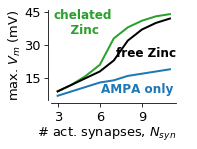

In [18]:
loc = 5

NSYNs = np.arange(1, 15)

def plot_nmda_effect(loc=5,
                     method='',
                     NSYNs = np.arange(1, 15)):
    
    #area0, area1, area2 
    fig, ax = ge.figure()
    
    if method=='norm-area':
        x0, x1, x2 = get_third_pulse_cond_areas(LOCs[loc], NSYNs)
    else:
        x0, x1, x2 = get_max_depol_response(LOCs[loc], NSYNs)
        ylabel = 'max. $V_m$ (mV)'
        #x0, x1, x2 = area0, area1, area2
        
    ge.plot(NSYNs ,Y=[x0, x1, x2], ax=ax, no_set=True, COLORS=[ge.blue, ge.green, 'k'], lw=2)
    ge.annotate(ax, 'AMPA only', (0.4, 0.05), color=ge.blue, size='small', bold=True)
    ge.annotate(ax, 'chelated\n    Zinc', (0.02, 0.7), color=ge.green, size='small', bold=True)
    ge.annotate(ax, 'free Zinc', (0.52, 0.45), color='k', size='small', bold=True)
    #ge.title(ax, 'NMDA-mediated effect')
    ge.set_plot(ax, ylabel=ylabel, xlabel='# act. synapses, $N_{syn}$    ')

plot_nmda_effect(NSYNs = np.arange(3, 12))   

In [ ]:
depol0, depol1, depol2 = get_max_depol_response()

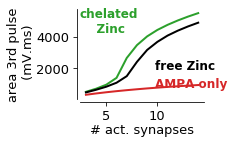

In [58]:
loc = 5

NSYNs = np.arange(3, 15)

area0, area1, area2 = get_third_pulse_cond_areas(LOCs[loc], NSYNs)
fig, ax = ge.figure()
ax.plot(NSYNs, area0, color=ge.red, lw=2)
ax.plot(NSYNs, area1, color=ge.green, lw=2)
ax.plot(NSYNs, area2, color='k', lw=2)
ge.annotate(ax, 'AMPA only', (0.6, 0.1), color=ge.red, size='small', bold=True)
ge.annotate(ax, 'chelated\n    Zinc', (0., 0.7), color=ge.green, size='small', bold=True)
ge.annotate(ax, 'free Zinc', (0.6, 0.3), color='k', size='small', bold=True)
#ge.title(ax, 'loc #%i' % loc)
ge.set_plot(ax, 
            ylabel='area 3rd pulse\n (mV.ms)', xlabel='# act. synapses')#, xticks=[2,6,10])

(<Figure size 238.11x204.094 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb336c8f710>)

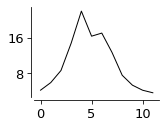

In [26]:
ge.plot((area1-area2)/area2*100)

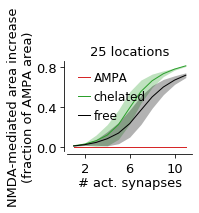

In [107]:
NSYNs = np.arange(1, 12)
Area0, Area1, Area2 = np.zeros((len(NSYNs), len(LOCs))), np.zeros((len(NSYNs), len(LOCs))), np.zeros((len(NSYNs), len(LOCs)))
Frac0, Frac1, Frac2 = np.zeros((len(NSYNs), len(LOCs))), np.zeros((len(NSYNs), len(LOCs))), np.zeros((len(NSYNs), len(LOCs)))
for i in range(len(LOCs)):
    
    Area0[:,i], Area1[:,i], Area2[:,i] = get_third_pulse_cond_areas(LOCs[i], NSYNs)
    Frac0[:,i], Frac1[:,i], Frac2[:,i] = 0*Area0[:,i], (Area1[:,i]-Area0[:,i])/Area1[:,i].max(),\
                        (Area2[:,i]-Area0[:,i])/Area1[:,i].max()
    
fig, ax = ge.figure()
#ge.plot(NSYNs, np.mean(Area0, axis=1), sy=np.std(Area0, axis=1), color=ge.red, label='AMPA', ax=ax, no_set=True)
#ge.plot(NSYNs, np.mean(Area1, axis=1), sy=np.std(Area1, axis=1), color=ge.green, label='chelated', ax=ax, no_set=True)
#ge.plot(NSYNs, np.mean(Area2, axis=1), sy=np.std(Area2, axis=1), color='k', label='free', ax=ax, no_set=True)
ge.plot(NSYNs, np.mean(Frac0, axis=1), sy=np.std(Frac0, axis=1), color=ge.red, label='AMPA', ax=ax, no_set=True)
ge.plot(NSYNs, np.mean(Frac1, axis=1), sy=np.std(Frac1, axis=1), color=ge.green, label='chelated', ax=ax, no_set=True)
ge.plot(NSYNs, np.mean(Frac2, axis=1), sy=np.std(Frac2, axis=1), color='k', label='free', ax=ax, no_set=True)
# ax.plot(NSYNs, area1, 
# ax.plot(NSYNs, area2, color='k', label='free')
#ge.legend(ax, size='xx-small')
ge.title(ax, '%i locations' % len(LOCs))
ge.set_plot(ax, 
            #ylabel='area 3rd pulse\n (mV.ms)', 
            ylabel='NMDA-mediated area increase\n(fraction of AMPA area)',
            xlabel='# act. synapses', xticks=[2,6,10])

In [ ]:
NSYNs = np.arange(1, 12)
Area0, Area1, Area2 = np.zeros((len(NSYNs), len(LOCs))), np.zeros((len(NSYNs), len(LOCs))), np.zeros((len(NSYNs), len(LOCs)))
for i in range(len(LOCs)):
    
    Area0[:,i], Area1[:,i], Area2[:,i] = get_third_pulse_cond_areas(LOCs[i], NSYNs)
    
fig, ax = ge.figure()
ge.plot(NSYNs, np.mean(Area0, axis=1), sy=np.std(Area0, axis=1), color=ge.red, label='AMPA', ax=ax, no_set=True)
ge.plot(NSYNs, np.mean(Area1, axis=1), sy=np.std(Area1, axis=1), color=ge.green, label='chelated', ax=ax, no_set=True)
ge.plot(NSYNs, np.mean(Area2, axis=1), sy=np.std(Area2, axis=1), color='k', label='free', ax=ax, no_set=True)
# ax.plot(NSYNs, area1, 
# ax.plot(NSYNs, area2, color='k', label='free')
ge.legend(ax, size='xx-small')
ge.title(ax, '%i locations' % len(LOCs))
ge.set_plot(ax, ylabel='area 3rd pulse\n (mV.ms)', xlabel='# act. synapses', xticks=[2,6,10])

In [36]:
from datavyz import ge
from analyz.IO.npz import load_dict
from scipy.interpolate import interp1d

NameError: name 'interp1d' is not defined

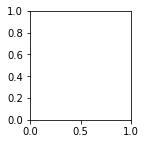

In [124]:
fig, ax = ge.figure(figsize=(.9,1.2))

COLORS = [ge.green, 'dimgrey']
x = np.linspace(2, 14)
for i, key in enumerate(['chelated-Zinc', 'free-Zinc']):
    
    X, Y = [], []
    data = load_dict('data/nmda-spike/demo-%s.npz' % key)
    for e, n in zip(data['events'], data['NSYNs']):
        cond = (data['t']>e) & (data['t']<e+100)
        Y.append(data['Vm_soma'][cond].max())#-data['Vm_soma'][0])
        X.append(n)
    
    func = interp1d(X, Y, kind='cubic')
    ax.plot(x, func(x), lw=2, color=COLORS[i])
    ge.annotate(ax, key, (i*.3, 1-i), color=COLORS[i], bold=True)
ge.set_plot(ax, ylabel='max $V_m$ (mV)', xlabel='# activated syn.\n$N_{syn}$',
            xlim=[2,13.5], 
            yticks=[-70, -50, -30])
fig.savefig('/home/yann/downloads/Figure_3.svg')

In [38]:
interp1d